In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
observations = pd.read_csv("observations.csv")
species = pd.read_csv("species_info.csv")

In [4]:
species

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [5]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [6]:
print(f"Dimensions for species: {species.shape}")
print(f"Dimensions for observations: {observations.shape}")

Dimensions for species: (5824, 4)
Dimensions for observations: (23296, 3)


In [7]:
print(f"Different types of species: {species.scientific_name.nunique()}")

Different types of species: 5541


In [8]:
print(f"Different types of categories: {species.category.unique()}")
print(f"Different types of categories: {species.category.nunique()}")

Different types of categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']
Different types of categories: 7


In [9]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [10]:
print(f"Conservation status: {species.conservation_status.unique()}")

Conservation status: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [11]:
species.groupby("conservation_status").size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [12]:
print(f"na values: {species.conservation_status.isna().sum()}")

na values: 5633


In [13]:
print(f'Number of parks: {observations.park_name.nunique()}')
print(f"All park names: {observations.park_name.unique()}")

Number of parks: 4
All park names: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [14]:
species.fillna("Doing well", inplace=True)
species.groupby("conservation_status").size()

conservation_status
Doing well            5633
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
dtype: int64

In [15]:
conservationCategory = species[species.conservation_status !='Doing well'].groupby(["conservation_status", "category"])['scientific_name'].count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


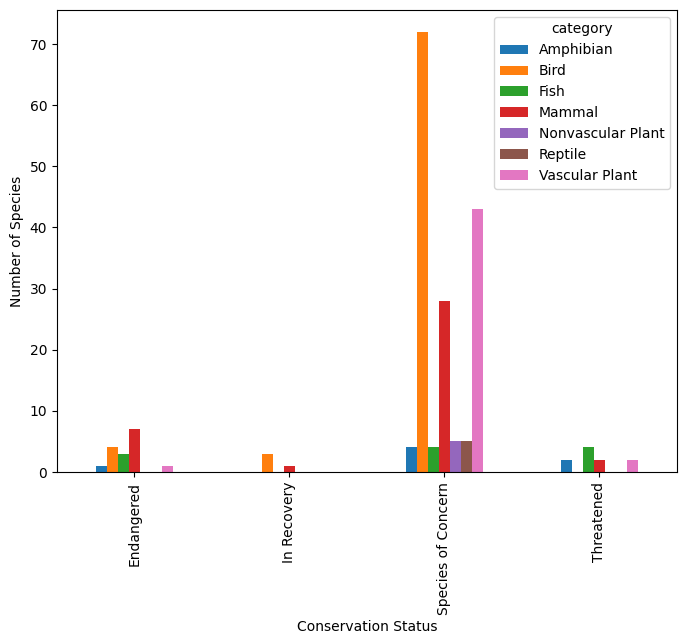

In [16]:
ax = conservationCategory.plot(kind = 'bar', figsize=(8,6))
ax.set_xlabel("Conservation Status")
ax.set_ylabel("Number of Species");

In [17]:
species['Protected_Species'] = species.conservation_status != 'Doing well'
category_counts = species.groupby(['category','Protected_Species'])\
.scientific_name.nunique().reset_index().pivot(index='category',columns='Protected_Species',values='scientific_name').reset_index()
category_counts.columns = ['category', 'Not_Protected', 'Protected']
category_counts

,category,Not_Protected,Protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [18]:
category_counts['Percent_Protected'] = category_counts.Protected / \
                                      (category_counts.Protected + category_counts.Not_Protected) * 100

category_counts

,category,Not_Protected,Protected,Percent_Protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


In [19]:
from scipy.stats import chi2_contingency

In [20]:
#chi sq. test between birds and mammals
contingency1=[[30,146],[75,413]]
chi2_contingency(contingency1)

Chi2ContingencyResult(statistic=np.float64(0.1617014831654557), pvalue=np.float64(0.6875948096661336), dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))

In [21]:
#chi sq. test between reptiles and mammals
contingency2=[[30,146],[5,73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=np.float64(4.289183096203645), pvalue=np.float64(0.03835559022969898), dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

In [22]:
#splitting common names 
from itertools import chain
import string

def replacing_punctuation(text):
    for i in string.punctuation:
        text = text.replace(i,'')
    return text

common_Names = species[species.category == 'Mammal'].common_names.apply(replacing_punctuation).str.split().tolist()
common_Names

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf'],
 ['Common', 'Gray', 'Fox', 'Gray', 'Fox'],
 ['Black', 'Fox', 'Cross', 'Fox', 'Red', 'Fox', 'Silver', 'Fox'],
 ['Red', 'Fox'],
 ['Mountain', 'Lion'],
 ['Wild', 'Cat', 'Wildcat'],
 ['Bobcat'],
 ['Panther', 'Mountain', 'Lion'],
 ['Striped', 'Skunk'],
 ['Eastern', 'Spotted', 'Skunk'],
 ['River', 'Otter'],
 ['Northern', 'River', 'Otter'],
 ['Fisher'],
 ['Mink', 'Or', 'Weasel'],
 ['LongTailed', 'Weasel'],
 ['Least', 'Weasel'],
 ['Mink'],
 ['Common', 'Raccoon', 'Raccoon'],
 ['Black', 'Bear'],
 ['Rafinesques', 'BigEared', 'Bat'],
 ['Big', 'Brown', 'Bat'],
 ['SilverHaired', 'Bat'],
 ['Eastern', 'Red', 'Bat', 'Red', 'Bat'],
 ['Hoary', 

In [23]:
#Cleaning duplicated words from the list 

CleanList=[]

for item in common_Names:
    item = list(dict.fromkeys(item))
    CleanList.append(item)
    
CleanList[:10]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer'],
 ['Feral', 'Hog', 'Wild', 'Pig'],
 ['Coyote'],
 ['Gray', 'Wolf'],
 ['Red', 'Wolf']]

In [24]:
one_list = list(chain.from_iterable(j if isinstance(j,list) else [j] for j in CleanList))
one_list[:10]

['Gappers',
 'RedBacked',
 'Vole',
 'American',
 'Bison',
 'Aurochs',
 'Domestic',
 'Cattle',
 'Feral',
 'Domesticated']

In [25]:
count_of_words = []

for i in one_list:
    x = one_list.count(i)
    count_of_words.append((i,x))
    
pd.DataFrame(set(count_of_words), columns=['Words','Number of occurances']).sort_values('Number of occurances', ascending=False).head(15)

,Words,Number of occurances
110,Bat,23
179,Shrew,18
29,Myotis,17
153,Mouse,16
56,Chipmunk,13
136,Squirrel,12
70,American,12
168,Vole,11
174,Eastern,11
133,Mountain,10


In [26]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)
species[species.is_bat].head(10)

,category,scientific_name,common_names,conservation_status,Protected_Species,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,Doing well,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",Doing well,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,Doing well,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,Doing well,False,True


In [27]:
bat_observations = observations.merge(species[species.is_bat])
bat_observations.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,Protected_Species,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,Doing well,False,True
2,Nycticeius humeralis,Yellowstone National Park,219,Mammal,Evening Bat,Doing well,False,True
3,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
4,Lasiurus borealis,Yosemite National Park,134,Mammal,"Eastern Red Bat, Red Bat",Doing well,False,True


In [28]:
bat_observations.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [29]:
obs_by_park = bat_observations.groupby(['park_name','Protected_Species']).observations.sum().reset_index()
obs_by_park

,park_name,Protected_Species,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


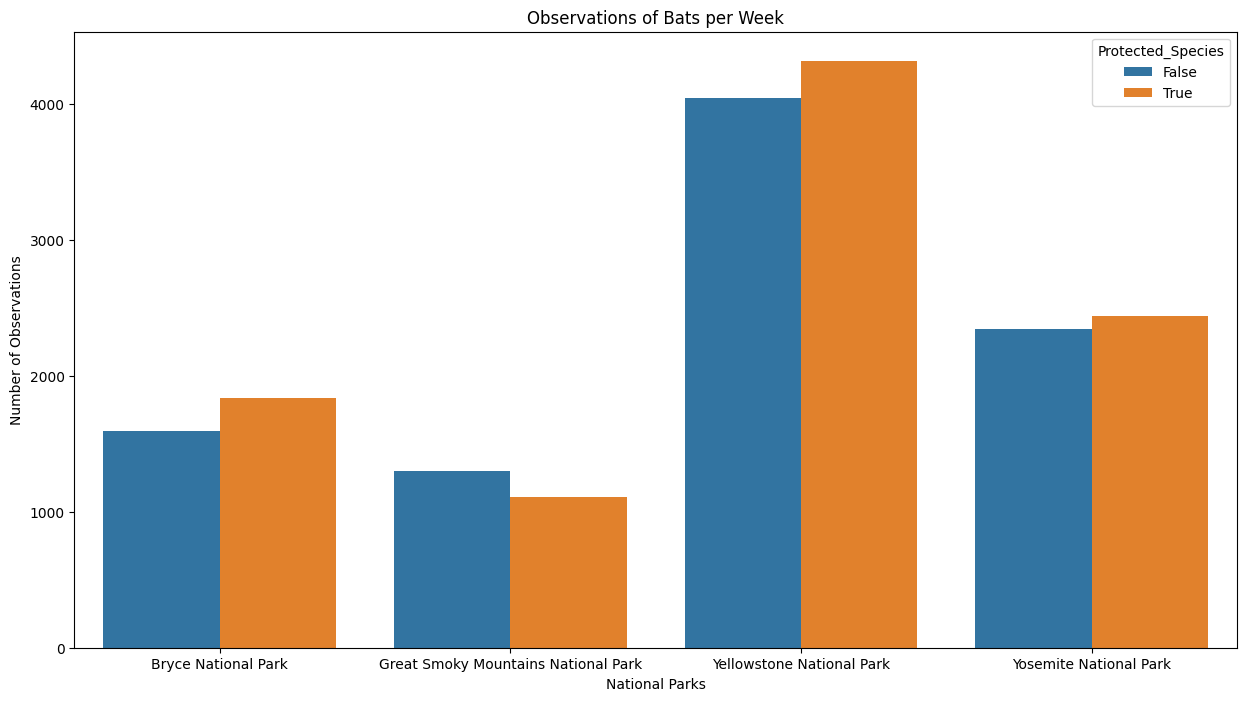

In [30]:
plt.figure(figsize=(15,8))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.Protected_Species)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats per Week')
plt.show()